In [226]:
import albumentations as A
import torchvision
import numpy as np
import torchvision.transforms as T
import cv2
import matplotlib.pyplot as plt

In [40]:
train_dataset_path = '../dataset/handwritten_math_symbols/train/'
eval_dataset_path = '../dataset/handwritten_math_symbols/eval/'

In [41]:
train_dataset = torchvision.datasets.ImageFolder(root=train_dataset_path)
eval_dataset = torchvision.datasets.ImageFolder(root=eval_dataset_path)

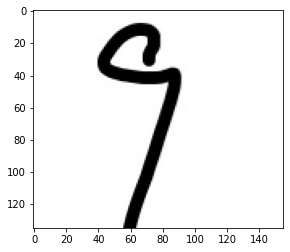

In [65]:
img = train_dataset[3510][0]
plt.imshow(np.array(img)/255)

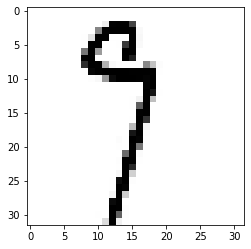

In [92]:
resized_img = A.Resize(width=32, height=32)(image=((np.array(img))))['image']
plt.imshow(resized_img)

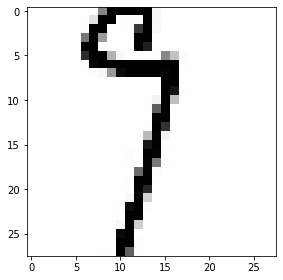

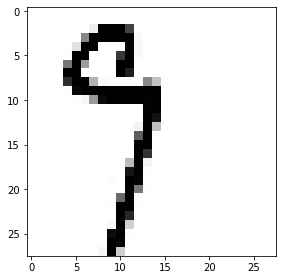

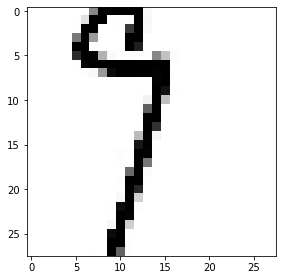

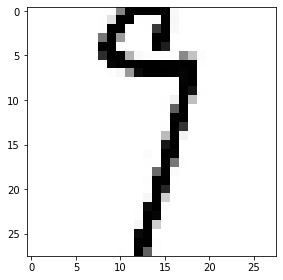

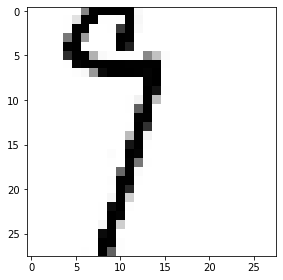

In [93]:
for i in range(5):
    plt.imshow(A.RandomCrop(width=28, height=28)(image=np.array(resized_img))['image'])
    plt.tight_layout()
    plt.show()

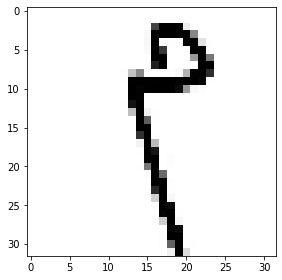

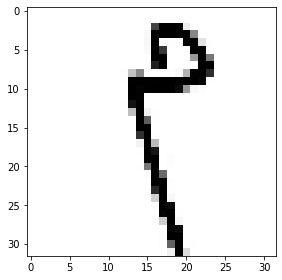

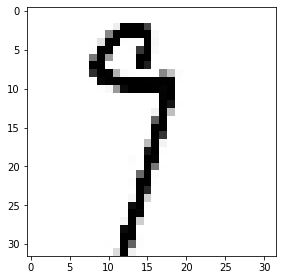

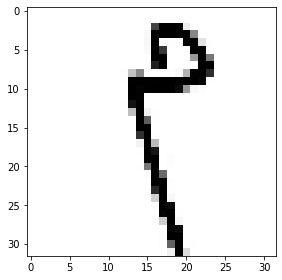

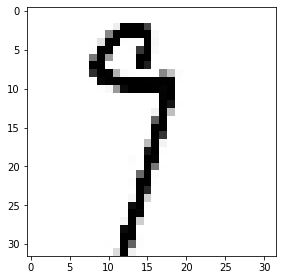

In [98]:
# not needed
for i in range(5):
    plt.imshow(A.HorizontalFlip(p=0.5)(image=np.array(resized_img))['image'])
    plt.tight_layout()
    plt.show()

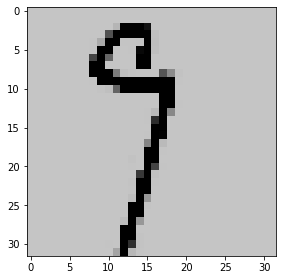

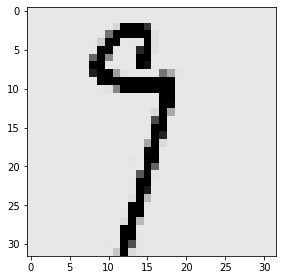

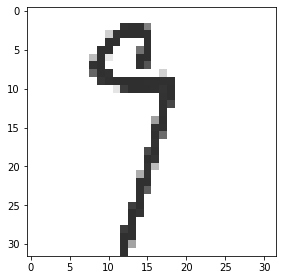

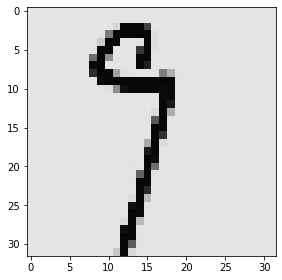

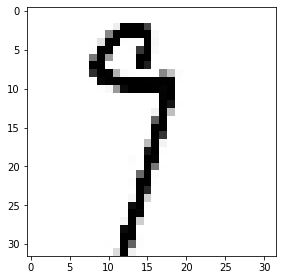

In [101]:
# not useful
for i in range(5):
    plt.imshow(A.RandomBrightnessContrast(p=0.7)(image=np.array(resized_img))['image'])
    plt.tight_layout()
    plt.show()

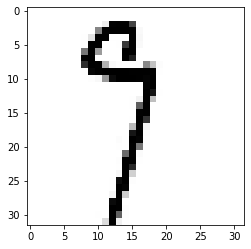

In [109]:
gray_img = A.ToGray()(image=((np.array(resized_img))))['image']
plt.imshow(gray_img)

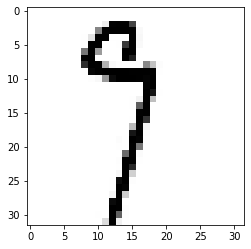

In [191]:
# No Use
plt.imshow(A.RandomContrast()(image=((np.array(resized_img))))['image'])

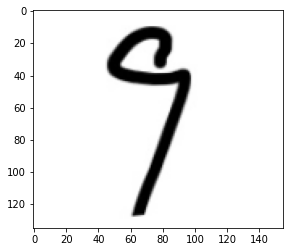

In [423]:
plt.imshow(A.Perspective(scale=(0.08, 0.1),p=1, fit_output=True, pad_val=(255, 255, 255))(image=nimg)['image'])

In [319]:
nimg = np.array(img)

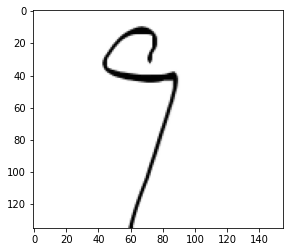

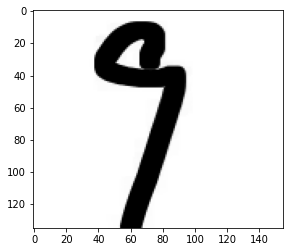

In [328]:
kernel = np.ones((4, 6), np.uint8)
 
# The first parameter is the original image,
# kernel is the matrix with which image is
# convolved and third parameter is the number
# of iterations, which will determine how much
# you want to erode/dilate a given image.
img_erosion = cv2.erode(nimg, kernel, iterations=1)
img_dilation = cv2.dilate(nimg, kernel, iterations=1) plt.imshow(img_dilation) plt.show()
plt.imshow(img_erosion)
plt.show()

In [330]:
A.Resize(width=32, height=32)(image=((np.array(img))))

{'image': array([[[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        ...,
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255,

In [336]:
T.RandomPerspective(distortion_scale=0.6, p=1, fill=255)(img).__str

'<PIL.Image.Image image mode=RGB size=155x135 at 0x7FD95D73F7C0>'